In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Cleaning & Exploration

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.shape

(200, 5)

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.drop(columns=['CustomerID'], inplace=True)

In [10]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### Distribution PLots of Age, Annual Income and Spending Score

/home/manu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/manu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/manu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

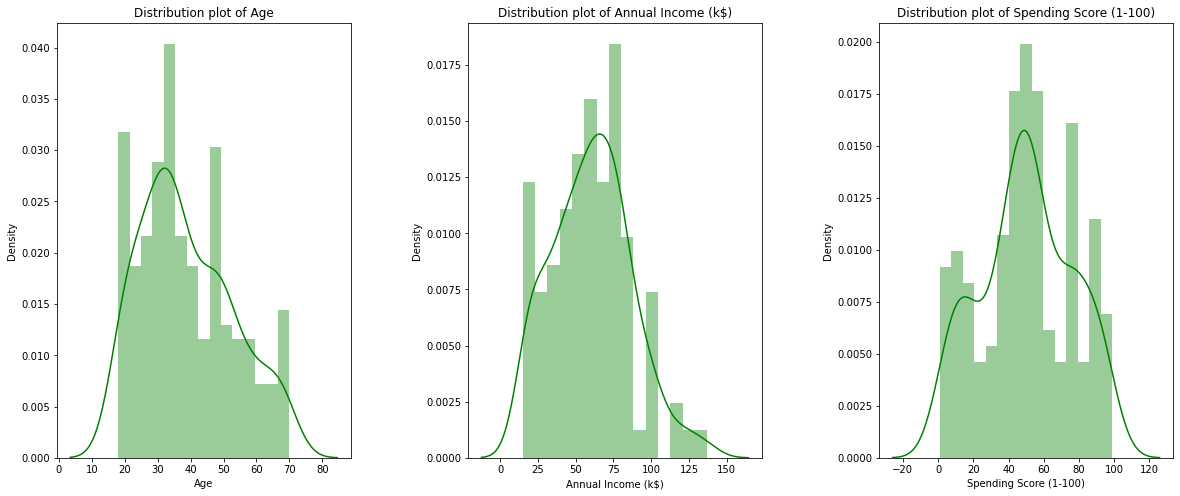

In [16]:
plt.figure(1, figsize=(20,8))
n = 0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.4,wspace=0.4)
    sns.distplot(df[x], bins=15, color='green')
    plt.title(f'Distribution plot of {x}')
    
plt.show()    

### Comparing the No. of males and females in our data

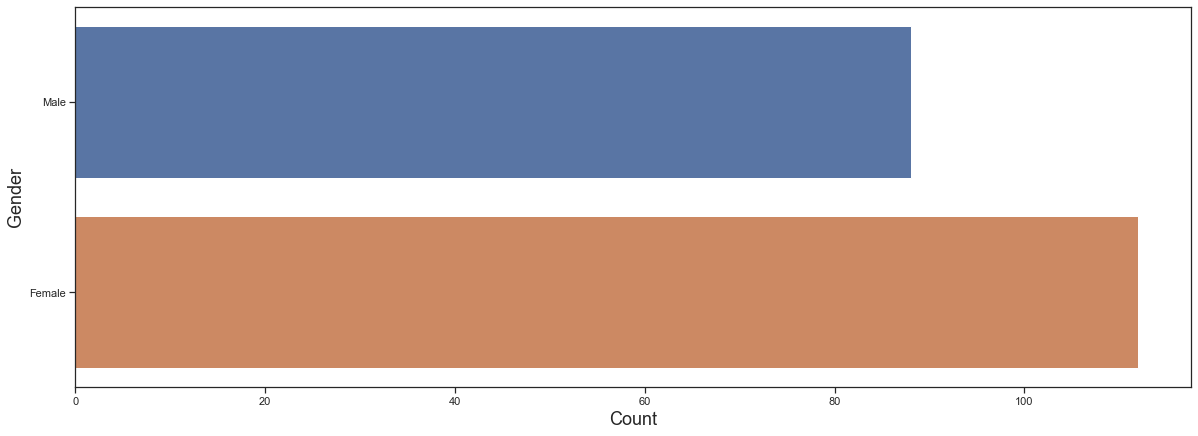

In [25]:
plt.figure(figsize=(20,7))
sns.countplot(y='Gender',data=df)
sns.set_theme(style="ticks")
plt.xlabel('Count', size=18)
plt.ylabel('Gender', size=18)
plt.show()

### Representing Age, Annual Income and Spending Score based on Gender using a violin plot

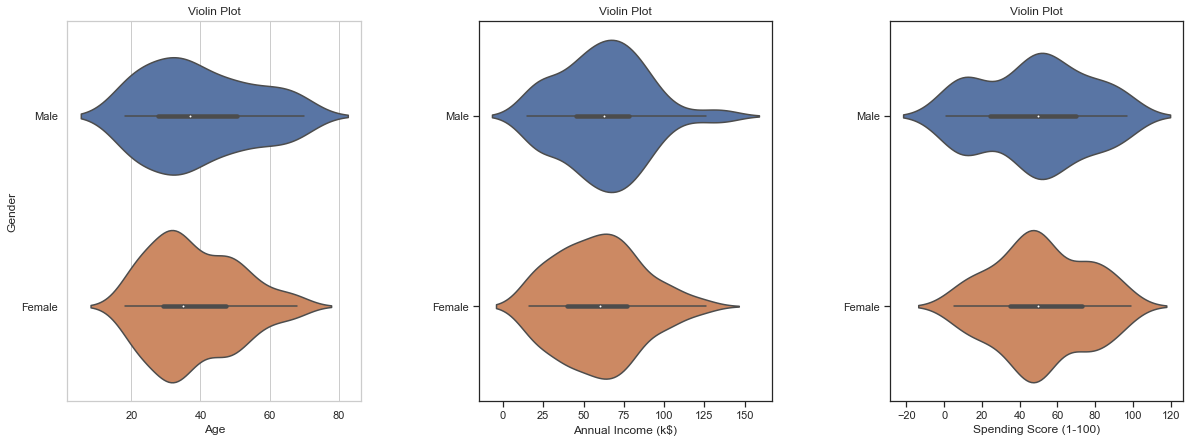

In [30]:
plt.figure(figsize=(20,7))
n = 0
for j in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    sns.set(style='ticks')
    plt.subplots_adjust(hspace=0.4,wspace=0.4)
    sns.violinplot(x=j, y='Gender', data=df)
    plt.ylabel('Gender' if n ==1 else '')
    
    plt.title('Violin Plot')
plt.show()

### The number of customers according to age

In [33]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [31]:
age_18_25 = df.Age[(df.Age >=18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >=26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >=36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >=46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 55]

In [34]:
age_x = ['18-25','26-35','36-45','46-55','55+']
age_y = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

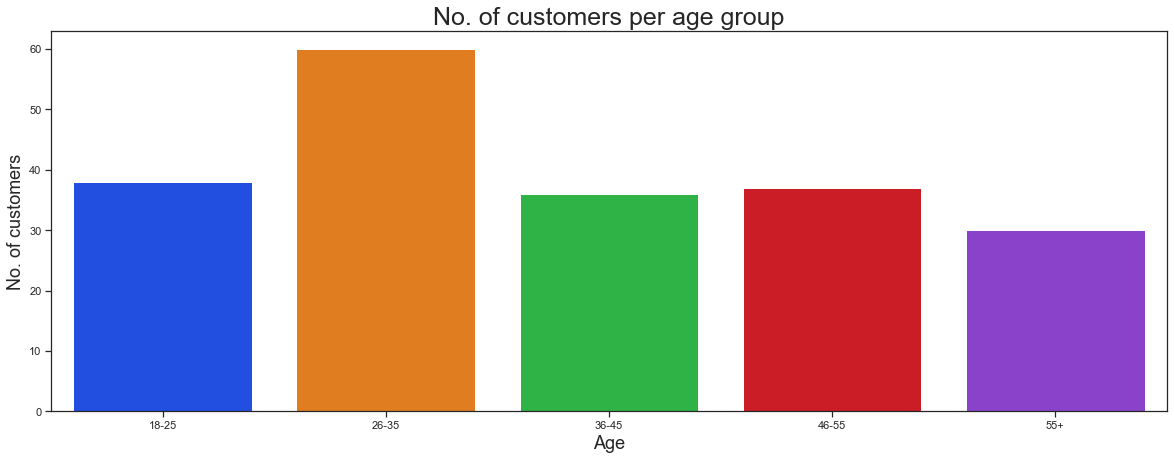

In [39]:
plt.figure(figsize=(20,7))
sns.barplot(x=age_x,y=age_y,palette='bright')
plt.xlabel('Age', size=18)
plt.ylabel('No. of customers', size=18)
plt.title('No. of customers per age group', size=25)
plt.show()

### Correlation between Annual Income and Spending Score

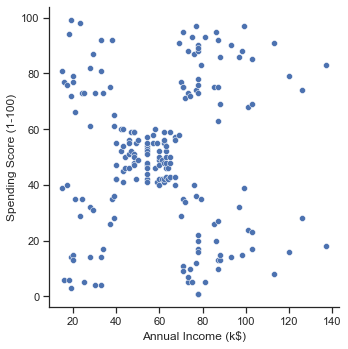

In [45]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=df)

In [46]:
df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [47]:
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 20)]
ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]


In [48]:
ss_x = ['1-20','21-40','41-60','61-80','81-100']
ss_y = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

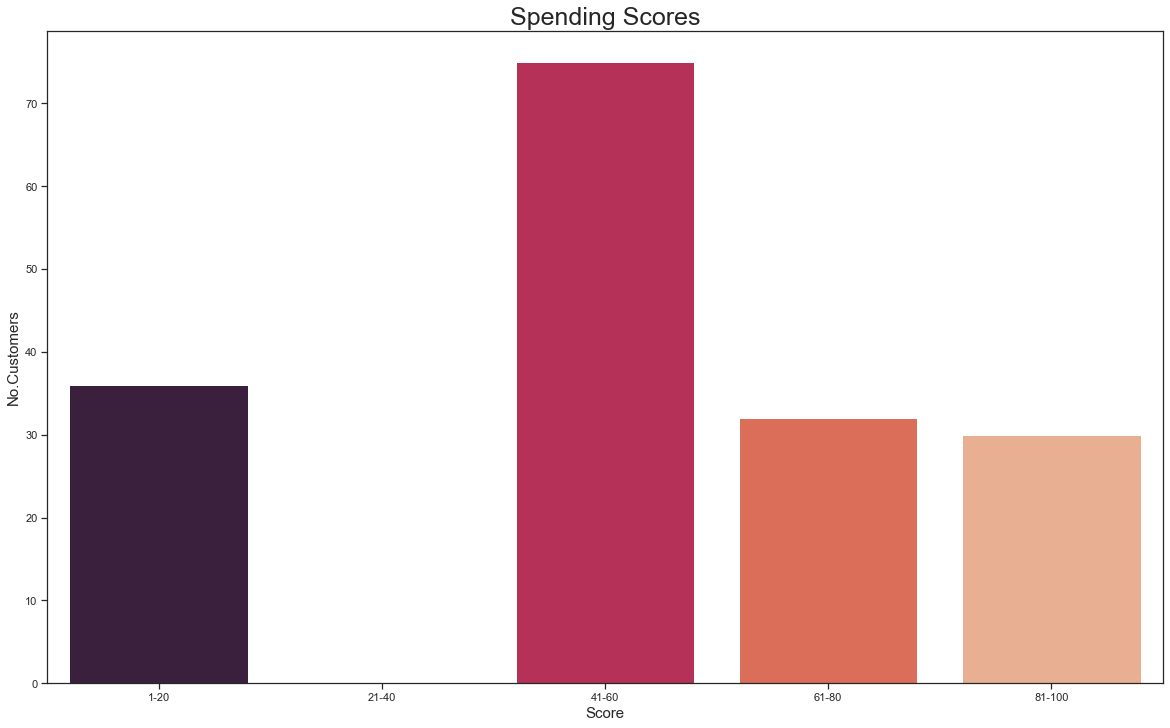

In [51]:
plt.figure(figsize=(20,12))
sns.barplot(x=ss_x,y=ss_y,palette='rocket')
plt.title('Spending Scores',size=25)
plt.xlabel('Score',size=15)
plt.ylabel('No.Customers',size=15)
plt.show()

In [52]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [53]:
ai_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
ai31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
ai61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
ai91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
ai121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]


In [54]:
aix = ['$ 0-30000','$ 31000-60000','$ 61000-90000','$ 91000-120000','$ 121000-150000']
aiy = [len(ai_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]

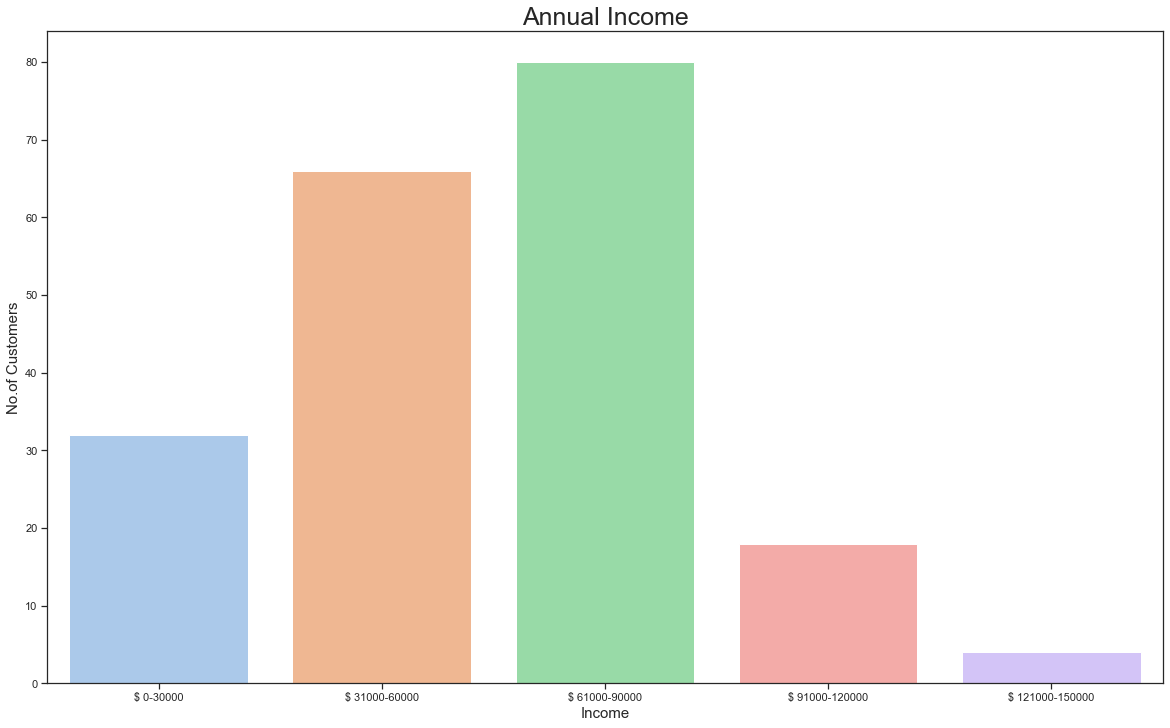

In [57]:
plt.figure(figsize=(20,12))
sns.barplot(x=aix,y=aiy,palette='pastel')
plt.title('Annual Income',size=25)
plt.xlabel('Income',size=15)
plt.ylabel('No.of Customers',size=15)
plt.show()

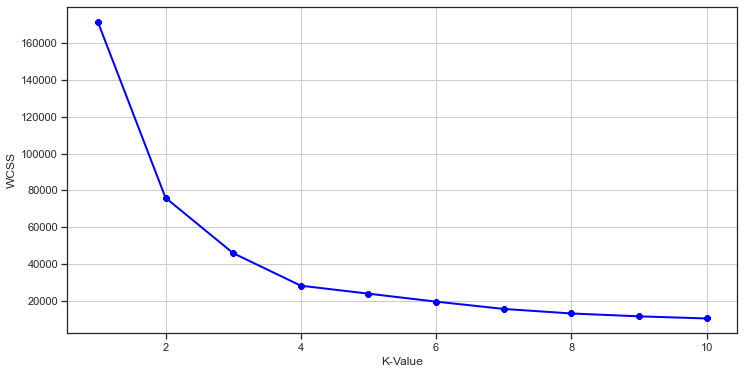

In [62]:
X1 = df.loc[:,['Age','Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2, color='blue', marker='8')
plt.xlabel('K-Value',size=15)
plt.ylabel('WCSS',size=15)
plt.show()

In [63]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

[0 2 3 2 0 2 3 2 3 2 3 2 3 2 3 2 0 0 3 2 0 2 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3
 2 3 2 1 2 1 0 3 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 2 0 2 1 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 1 2
 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 2 3 2 3 2 0
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [64]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]]


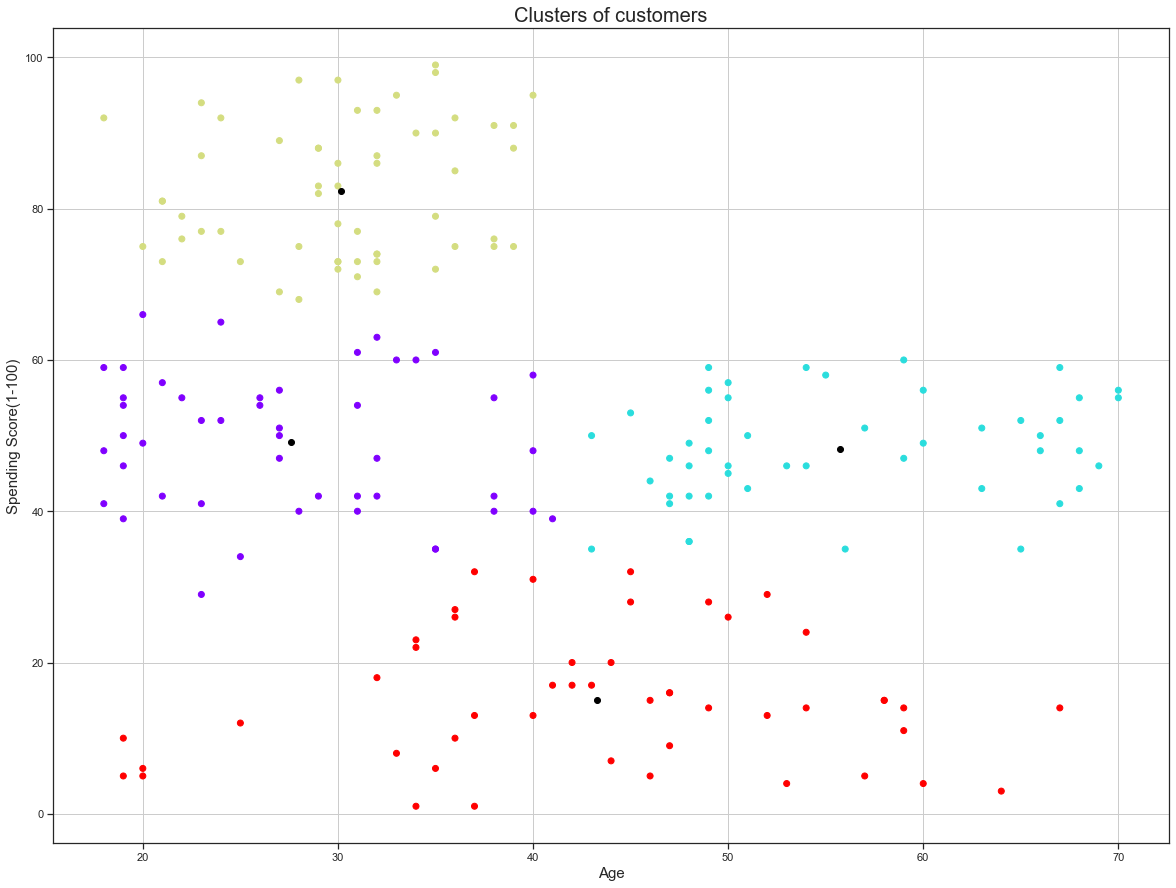

In [72]:
plt.figure(figsize=(20,15))
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of customers', size=20)
plt.xlabel('Age', size=15)
plt.ylabel('Spending Score(1-100)',size=15)
plt.grid()
plt.show()

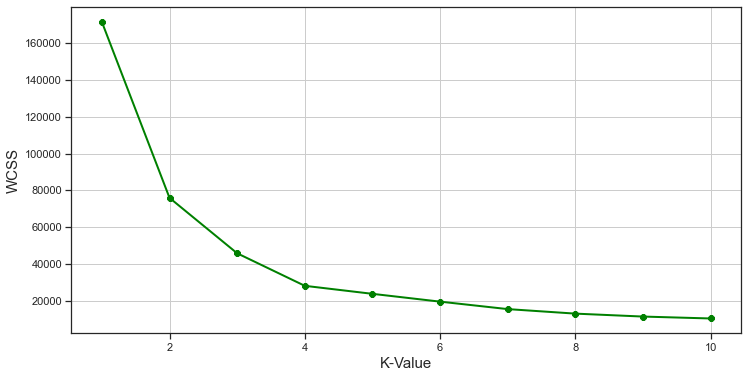

In [74]:
X2 = df.loc[:,['Age','Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2, color='green', marker='8')
plt.xlabel('K-Value',size=15)
plt.ylabel('WCSS',size=15)
plt.show()

In [76]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

[2 1 3 1 2 1 3 1 0 1 0 1 0 1 3 1 2 2 0 1 2 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0
 1 3 1 4 1 4 2 0 2 4 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 4 4 4 2 4 4 2 2 4 4 4 4
 4 2 4 2 2 4 4 2 4 4 2 4 4 2 2 4 4 2 4 2 2 2 4 2 4 2 2 4 4 2 4 2 4 4 4 4 4
 2 2 2 2 2 4 4 4 4 2 2 2 1 3 1 4 1 0 1 0 1 2 1 3 1 0 1 3 1 0 1 2 1 3 1 4 1
 3 1 0 1 0 1 0 1 3 1 3 1 4 1 3 1 0 1 0 1 3 2 3 1 3 1 0 1 0 1 0 1 2 1 0 1 2
 1 0 1 0 1 3 1 3 1 0 1 0 1 3 1]


In [77]:
print(kmeans.cluster_centers_)

[[50.46666667 16.1       ]
 [30.1754386  82.35087719]
 [27.91489362 49.21276596]
 [30.55555556 13.05555556]
 [55.70833333 48.22916667]]


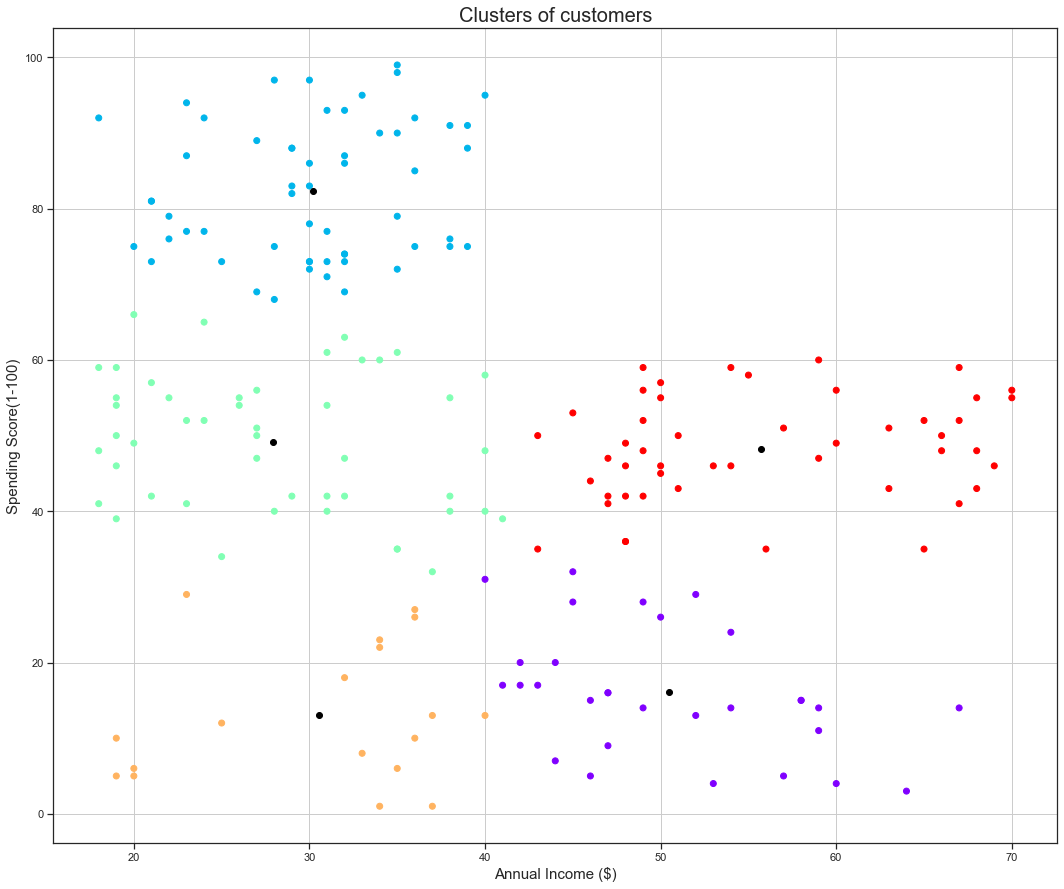

In [79]:
plt.figure(figsize=(18,15))
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of customers', size=20)
plt.xlabel('Annual Income ($)', size=15)
plt.ylabel('Spending Score(1-100)',size=15)
plt.grid()
plt.show()

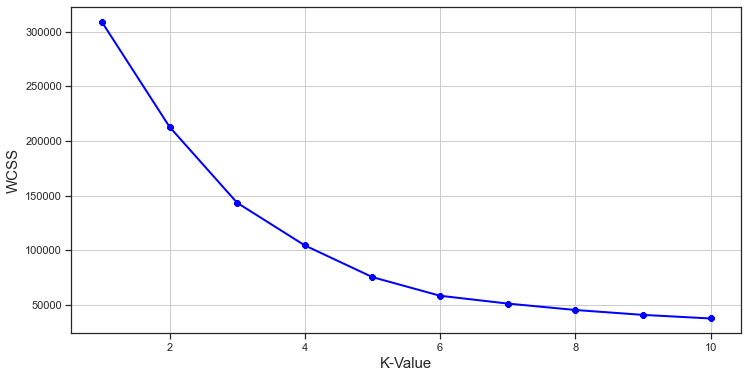

In [80]:
X3 = df.iloc[:,1:]
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2, color='blue', marker='8')
plt.xlabel('K-Value',size=15)
plt.ylabel('WCSS',size=15)
plt.show()

In [81]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X3)
print(label)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 2 1 4 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 4 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [82]:
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [40.66666667 87.75       17.58333333]
 [25.52173913 26.30434783 78.56521739]
 [43.08860759 55.29113924 49.56962025]]


### 3D Representation